# Example for using "maketaper"

In [1]:
## Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Import useful things
from nrutils import gwylm,scsearch,romline,maketaper,lim
# Setup plotting backend
# import matplotlib as mpl
# mpl.rcParams['lines.linewidth'] = 0.8
# mpl.rcParams['font.size'] = 12
# mpl.rcParams['axes.labelsize'] = 20
# mpl.rcParams['axes.titlesize'] = 20
# mpl.rcParams['xtick.labelsize'] = 18
# mpl.rcParams['ytick.labelsize'] = 18
# from matplotlib import rc
# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
from matplotlib.pyplot import *
from mpl_toolkits.mplot3d import Axes3D
#
from numpy import *

(nrutils)>> Applying matplotlib settings.


## Find a simulation using the catalog

In [6]:
A = scsearch(keyword='base_96',verbose=True)

(scsearch)>> Found keyword (='base_96') keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
## Found 1 possibly degenerate simulations:
[0001][hogshead] dirac-nr-followup: 1chi0.42-2chi0.42-p-q1.20	(q1.2_base_96)



## Load sim data

In [9]:
y = gwylm(A[0],lm=(2,2),verbose=True,clean=False)

(gwylm)>> Found dt (=0.15) keyword.
(gwylm)>> Found lm (=(2, 2)) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x113ef43b0>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (2,5), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, 2)]
(load)>> Loading: psi3col.r2.l5.l2.m2.gz
(load)>> Imposing a default padding of 3 to the data.
(pad_wfarr)>> The shape was (10000, 3). Now the shape is (10003, 3).
(gwylm)>> Storing w22 from a PN estimate[see pnw0 in basics.py, and/or arxiv:1310.1528v4]. This will be the frequency parameter used if strain is to be calculated.
(calcflm)>> w0(w22) = 0.048727 (this is the lower frequency used for FFI method [arxiv:1006.1632v3])
(calchlm)>> w22 = m*w22/2 = 0.048727 (this is 

## Plot waveform characteristics

Text(0.5,1,u'The waveform should be windowed to zero at both ends. But since we called gwylm with clean=False, there has been no tapering.')

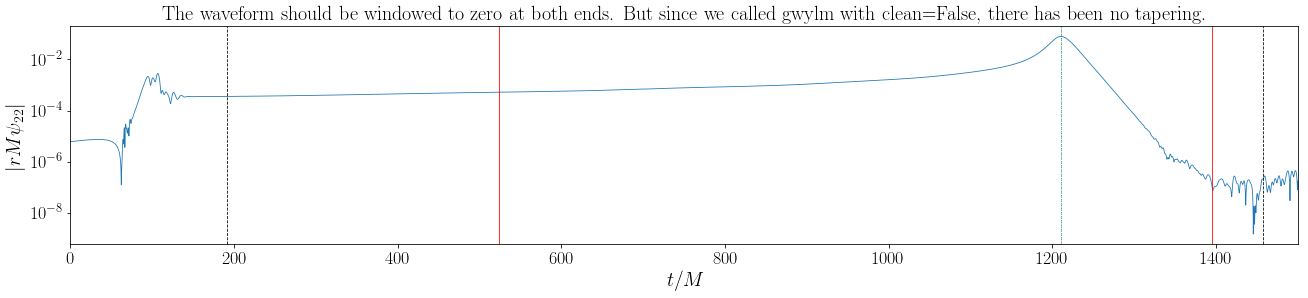

In [10]:
figure( figsize=2*array([11,2]) )

u = y.ylm[0]

plot( u.t, u.amp )

# Demarcate strict beginning and end of waveform
axvline( u.t[y.startindex], linestyle='--', color='k' )
axvline( u.t[y.endindex], linestyle='--', color='k' )

# Demarcate strict (index) peak of waveform
axvline( u.t[u.k_amp_max], linestyle=':', color='c' )
# Demarcate strict INTERPOLATED peak of waveform
axvline( u.intrp_t_amp_max, linestyle='--', color='k', alpha=0.3 )

# Demarcate effective beginning and end of waveform 
axvline( u.t[ y.preinspiral.right_index ], linestyle='-', color='r' )
axvline( u.t[ y.postringdown.left_index ], linestyle='-', color='r' )

gca().set_yscale('log')
xlabel('$t/M$')
ylabel('$|$'+u.kind+'$|$')

xlim(lim(u.t))

title('The waveform should be windowed to zero at both ends. But since we called gwylm with clean=False, there has been no tapering.')

## nrutils can automatically taper, but here's an example of how it works

(nrutils)>> Applying matplotlib settings.


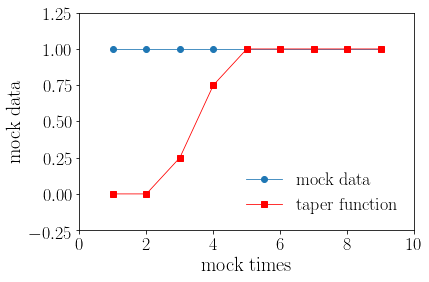

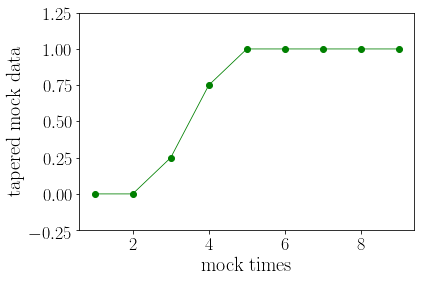

In [4]:

# The maketaper functoin takes in a time series (any function domain really), and a 2x1 iterable of indeces defining the start and end of the taper. 
# For example:

# Make fake data
mock_times = arange(1,10)
mock_range_values = ones_like( mock_times )
index_start = 1
index_end = 4

# Create a taper function
the_taper = maketaper( mock_times, [index_start,index_end] )

# Plot the taper function against the dummy data
plot( mock_times, mock_range_values, '-o', label='mock data' )
plot( mock_times, the_taper, '-rs', label='taper function' )
xlim([0,10])
ylim([-0.25,1.25])
xlabel('mock times')
ylabel('mock data')
legend(frameon=False,loc='best')

# To apply the taper, simply multiply the data by the taper
tapered_mock_values = the_taper * mock_range_values

# Plot the result
figure()
plot( mock_times, tapered_mock_values, '-og' )
ylim([-0.25,1.25])
xlabel('mock times')
ylabel('tapered mock data')
legend(frameon=False,loc='best')
